### Loading the dataset

In [31]:
import pandas as pd
import numpy as np

tax_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv')
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


#### Understanding the dataset

In [32]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
Unnamed: 0        803 non-null int64
HHI               803 non-null int64
HHDL              803 non-null int64
Married           803 non-null int64
CollegGrads       803 non-null int64
AHHAge            803 non-null int64
Cars              803 non-null int64
Filed in 2017     803 non-null int64
Filed in 2016     803 non-null int64
Filed in 2015     803 non-null int64
PoliticalParty    803 non-null object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [33]:
tax_data.shape

(803, 11)

#### *Descriptive Statistics*

In [34]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [35]:
tax_data.groupby('PoliticalParty').count()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
PoliticalParty,,,,,,,,,,
Democrat,269,269,269,269,269,269,269,269,269,269
Independent,269,269,269,269,269,269,269,269,269,269
Republican,265,265,265,265,265,265,265,265,265,265


In [36]:
tax_data.groupby('Filed in 2017').count()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2016,Filed in 2015,PoliticalParty
Filed in 2017,,,,,,,,,,
0,396,396,396,396,396,396,396,396,396,396
1,407,407,407,407,407,407,407,407,407,407


In [37]:
tax_data.groupby('Filed in 2016').count()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2015,PoliticalParty
Filed in 2016,,,,,,,,,,
0,394,394,394,394,394,394,394,394,394,394
1,409,409,409,409,409,409,409,409,409,409


In [38]:
tax_data.groupby('Filed in 2015').count()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,PoliticalParty
Filed in 2015,,,,,,,,,,
0,388,388,388,388,388,388,388,388,388,388
1,415,415,415,415,415,415,415,415,415,415


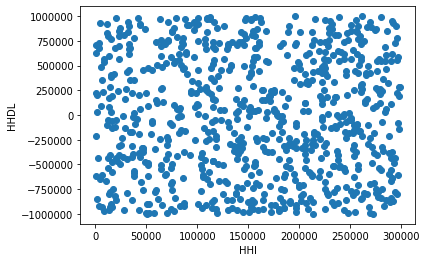

In [39]:
import matplotlib.pyplot as plt

plt.figure(100)
plt.scatter(x="HHI", y="HHDL", data=tax_data )
plt.xlabel("HHI")
plt.ylabel("HHDL")
plt.show()

In [40]:
tax_data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

###### Splitting the dataset to features and labels 

In [41]:
tax_X = tax_data.drop("PoliticalParty", axis=1)

tax_y = tax_data['PoliticalParty']

tax_X.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,61,183414,-12402,1,2,28,1,0,0,1
1,501,129786,700251,2,5,63,3,0,0,0
2,658,268343,493411,2,4,44,1,1,0,1
3,703,290506,-433408,1,1,28,5,1,0,1
4,702,90108,907135,1,3,57,5,1,1,0


In [42]:
tax_y.head()

0       Democrat
1     Republican
2    Independent
3     Republican
4       Democrat
Name: PoliticalParty, dtype: object

#### Splitting the data to train and test

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tax_X, tax_y, test_size=0.2, random_state=1)

In [44]:
X_train.shape

(642, 10)

In [45]:
y_train.shape

(642,)

In [46]:
X_test.shape

(161, 10)

In [47]:
y_test.shape

(161,)

#### Building the Model

In [48]:
# Working with a regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

###### Predicting

In [49]:
y_predi = lr.predict(X_test)
y_predi = pd.DataFrame(y_predi)
y_predi.head()

,0
0,Republican
1,Independent
2,Independent
3,Democrat
4,Republican


In [50]:
sol = pd.concat([y_test, y_predi], axis=1)
sol.head()

,PoliticalParty,0
0,NaN,Republican
1,NaN,Independent
2,NaN,Independent
3,Republican,Democrat
4,NaN,Republican


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi)

0.37888198757763975

#### Loading the test dataset for the tax pay

In [52]:
tax_test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv")
tax_test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


#### Understanding the test dataset

In [53]:
tax_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
Unnamed: 0       201 non-null int64
HHI              201 non-null int64
HHDL             201 non-null int64
Married          201 non-null int64
CollegGrads      201 non-null int64
AHHAge           201 non-null int64
Cars             201 non-null int64
Filed in 2017    201 non-null int64
Filed in 2016    201 non-null int64
Filed in 2015    201 non-null int64
dtypes: int64(10)
memory usage: 15.8 KB


In [54]:
tax_test_data.shape

(201, 10)

#### Descriptive statistics summary

In [55]:
tax_test_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [56]:
tax_test_data.isnull().sum()

Unnamed: 0       0
HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

#### modeling

In [57]:
# using the random forest classifier model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(tax_X, tax_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
tax_data_predict = rfc.predict(tax_test_data)
tax_data_predict = pd.DataFrame(tax_data_predict)
tax_data_predict.head()

,0
0,Independent
1,Democrat
2,Republican
3,Democrat
4,Republican


In [59]:
tax_data_predict.shape

(201, 1)

In [60]:
tax_data_predict = tax_data_predict.to_csv("Predicted Values of Tax pay.csv", index=False)